

- *Steps



1. Import libraries

2. Import the dataset

3. Perform Data Analysis & EDA

4. Spliting the data

5. [Optional] Data Preprocessing - Feature Scaling,...

6. Choosing a model - Decision Tree Regressor

7. Training the model

8. Testing the model

9. Checking the performance of the model

importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [7]:


!pip install pandas
import pandas as pd

# Use the 'raw' URL to access the raw CSV data on GitHub
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahmann/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#exploratory data analysis EDA

In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [10]:
df.tail() # 4340 data points

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [11]:
df.ndim

2

In [13]:
df.shape

(4340, 8)

In [14]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [15]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [16]:
df.info() # no null values no data  cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [19]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [20]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [21]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
# Create a column new_fuel and place it at index of the fuel column

# Replace the values:

# Petrol 0

# Diesel 1

# CNG - 2

# LPG - 3

# Electric-4
df.insert(4, 'new_fuel',value=df.fuel.replace({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}))



<ipython-input-23-5266fd90cec1>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.insert(4, 'new_fuel',value=df.fuel.replace({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}))


In [25]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [26]:
df.tail()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,0,Petrol,Individual,Manual,First Owner


In [28]:
df.new_fuel.unique()

array([0, 1, 2, 3, 4])

In [35]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [36]:
#now do the same for seller_type
# SO HERE THE FEASIBLE WAY OF INSERTING AT A LOCATION IS THAT USE DF.GET_LOC('FUEL') SO THEREBY WE CAN REPLACE AT THAT  INDEX ,USEFUL IN LARGE DATASET OOF MANY COLUMNS

df.insert(6, 'new_seller_type',value=df.seller_type.replace({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}))

<ipython-input-36-61614cab6e78>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.insert(6, 'new_seller_type',value=df.seller_type.replace({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}))


In [37]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


# SO THE THING IS WE CANT FEED MODEL THE CATEGORICAL DATA LIKE "PETROL" INDIVIDUAL,FIRST OWNER .... SO WE NEED TO REPLACE THEM WITH 0,1'S SO THE MODEL GETS FEED SO THIS THING CAN EASILY DONE BY ENCODERS SUCH AS LABEL ENCODERS ,ONE HOT ENCODERS ,THIS REPLACING VALUES KNOWN AS FEATURE ENGINEERING ,I.E DONE BY ENCODER'S

In [39]:
new_df=df.copy()

In [40]:
# SO THE THING IS WE CANT FEED MODEL THE CATEGORICAL DATA LIKE "PETROL" INDIVIDUAL,FIRST OWNER .... SO WE NEED TO REPLACE THEM WITH 0,1'S SO THE MODEL GETS FEED SO THIS THING CAN EASILY DONE BY ENCODERS SUCH AS LABEL ENCODERS ,ONE HOT ENCODERS ,THIS REPLACING VALUES KNOWN AS FEATURE ENGINEERING ,I.E DONE BY ENCODER'S
new_df = new_df[['fuel','seller_type']]

In [41]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [ ]:
# now convert the categoriical data to 0's 1's .... by encoders


from sklearn.preprocessing import LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
new_df['fuel'] = LabelEncoder().fit_transform(new_df['fuel'])# it assigns 1,2,3 based on first letter alphabet cng-0, diesel-1

In [44]:
new_df['fuel'].unique()

array([4, 1, 0, 3, 2])

In [45]:
new_df.head()

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [50]:
var=ColumnTransformer([('encoder',OneHotEncoder(),['seller_type'])],remainder='passthrough')

In [51]:
new_df.head()

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual


In [56]:
enc_df=pd.DataFrame(var.fit_transform(new_df[['seller_type']]),columns=['Individual','Dealer','Trustmark Dealer']) # Removed .toarray() as the output is already a dense array

In [57]:
enc_df.head()

,Individual,Dealer,Trustmark Dealer
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [58]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])

df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])

df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [59]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,4,0,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,4,0,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,0,4,0,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1,1,2


In [60]:
df['current_year']=2024

In [61]:
df['no_year']=df['current_year']-df['year']

In [62]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,current_year,no_year
0,Maruti 800 AC,2007,60000,70000,0,4,0,1,1,0,2024,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,4,0,1,1,0,2024,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,1,1,0,2024,12
3,Datsun RediGO T Option,2017,250000,46000,0,4,0,1,1,0,2024,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1,1,2,2024,10


In [63]:
# drop name,year,current_year
df.drop(['name','year','current_year'],axis=1,inplace=True)

In [64]:
#rename selling price to current selling price
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [65]:
df.head()

,current_selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,no_year
0,60000,70000,0,4,0,1,1,0,17
1,135000,50000,0,4,0,1,1,0,17
2,600000,100000,1,1,0,1,1,0,12
3,250000,46000,0,4,0,1,1,0,7
4,450000,141000,1,1,0,1,1,2,10


In [66]:
# checking if categorical values exsists or not
df.info()# all are int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   new_fuel               4340 non-null   int64
 3   fuel                   4340 non-null   int64
 4   new_seller_type        4340 non-null   int64
 5   seller_type            4340 non-null   int64
 6   transmission           4340 non-null   int64
 7   owner                  4340 non-null   int64
 8   no_year                4340 non-null   int64
dtypes: int64(9)
memory usage: 305.3 KB


<Axes: >

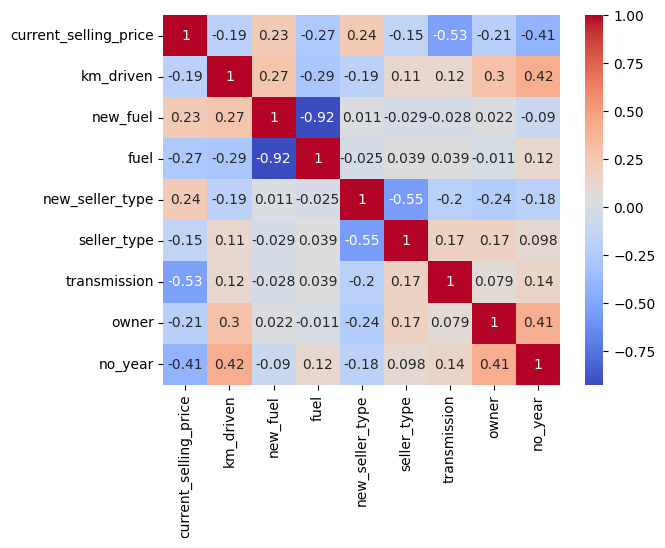

In [67]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

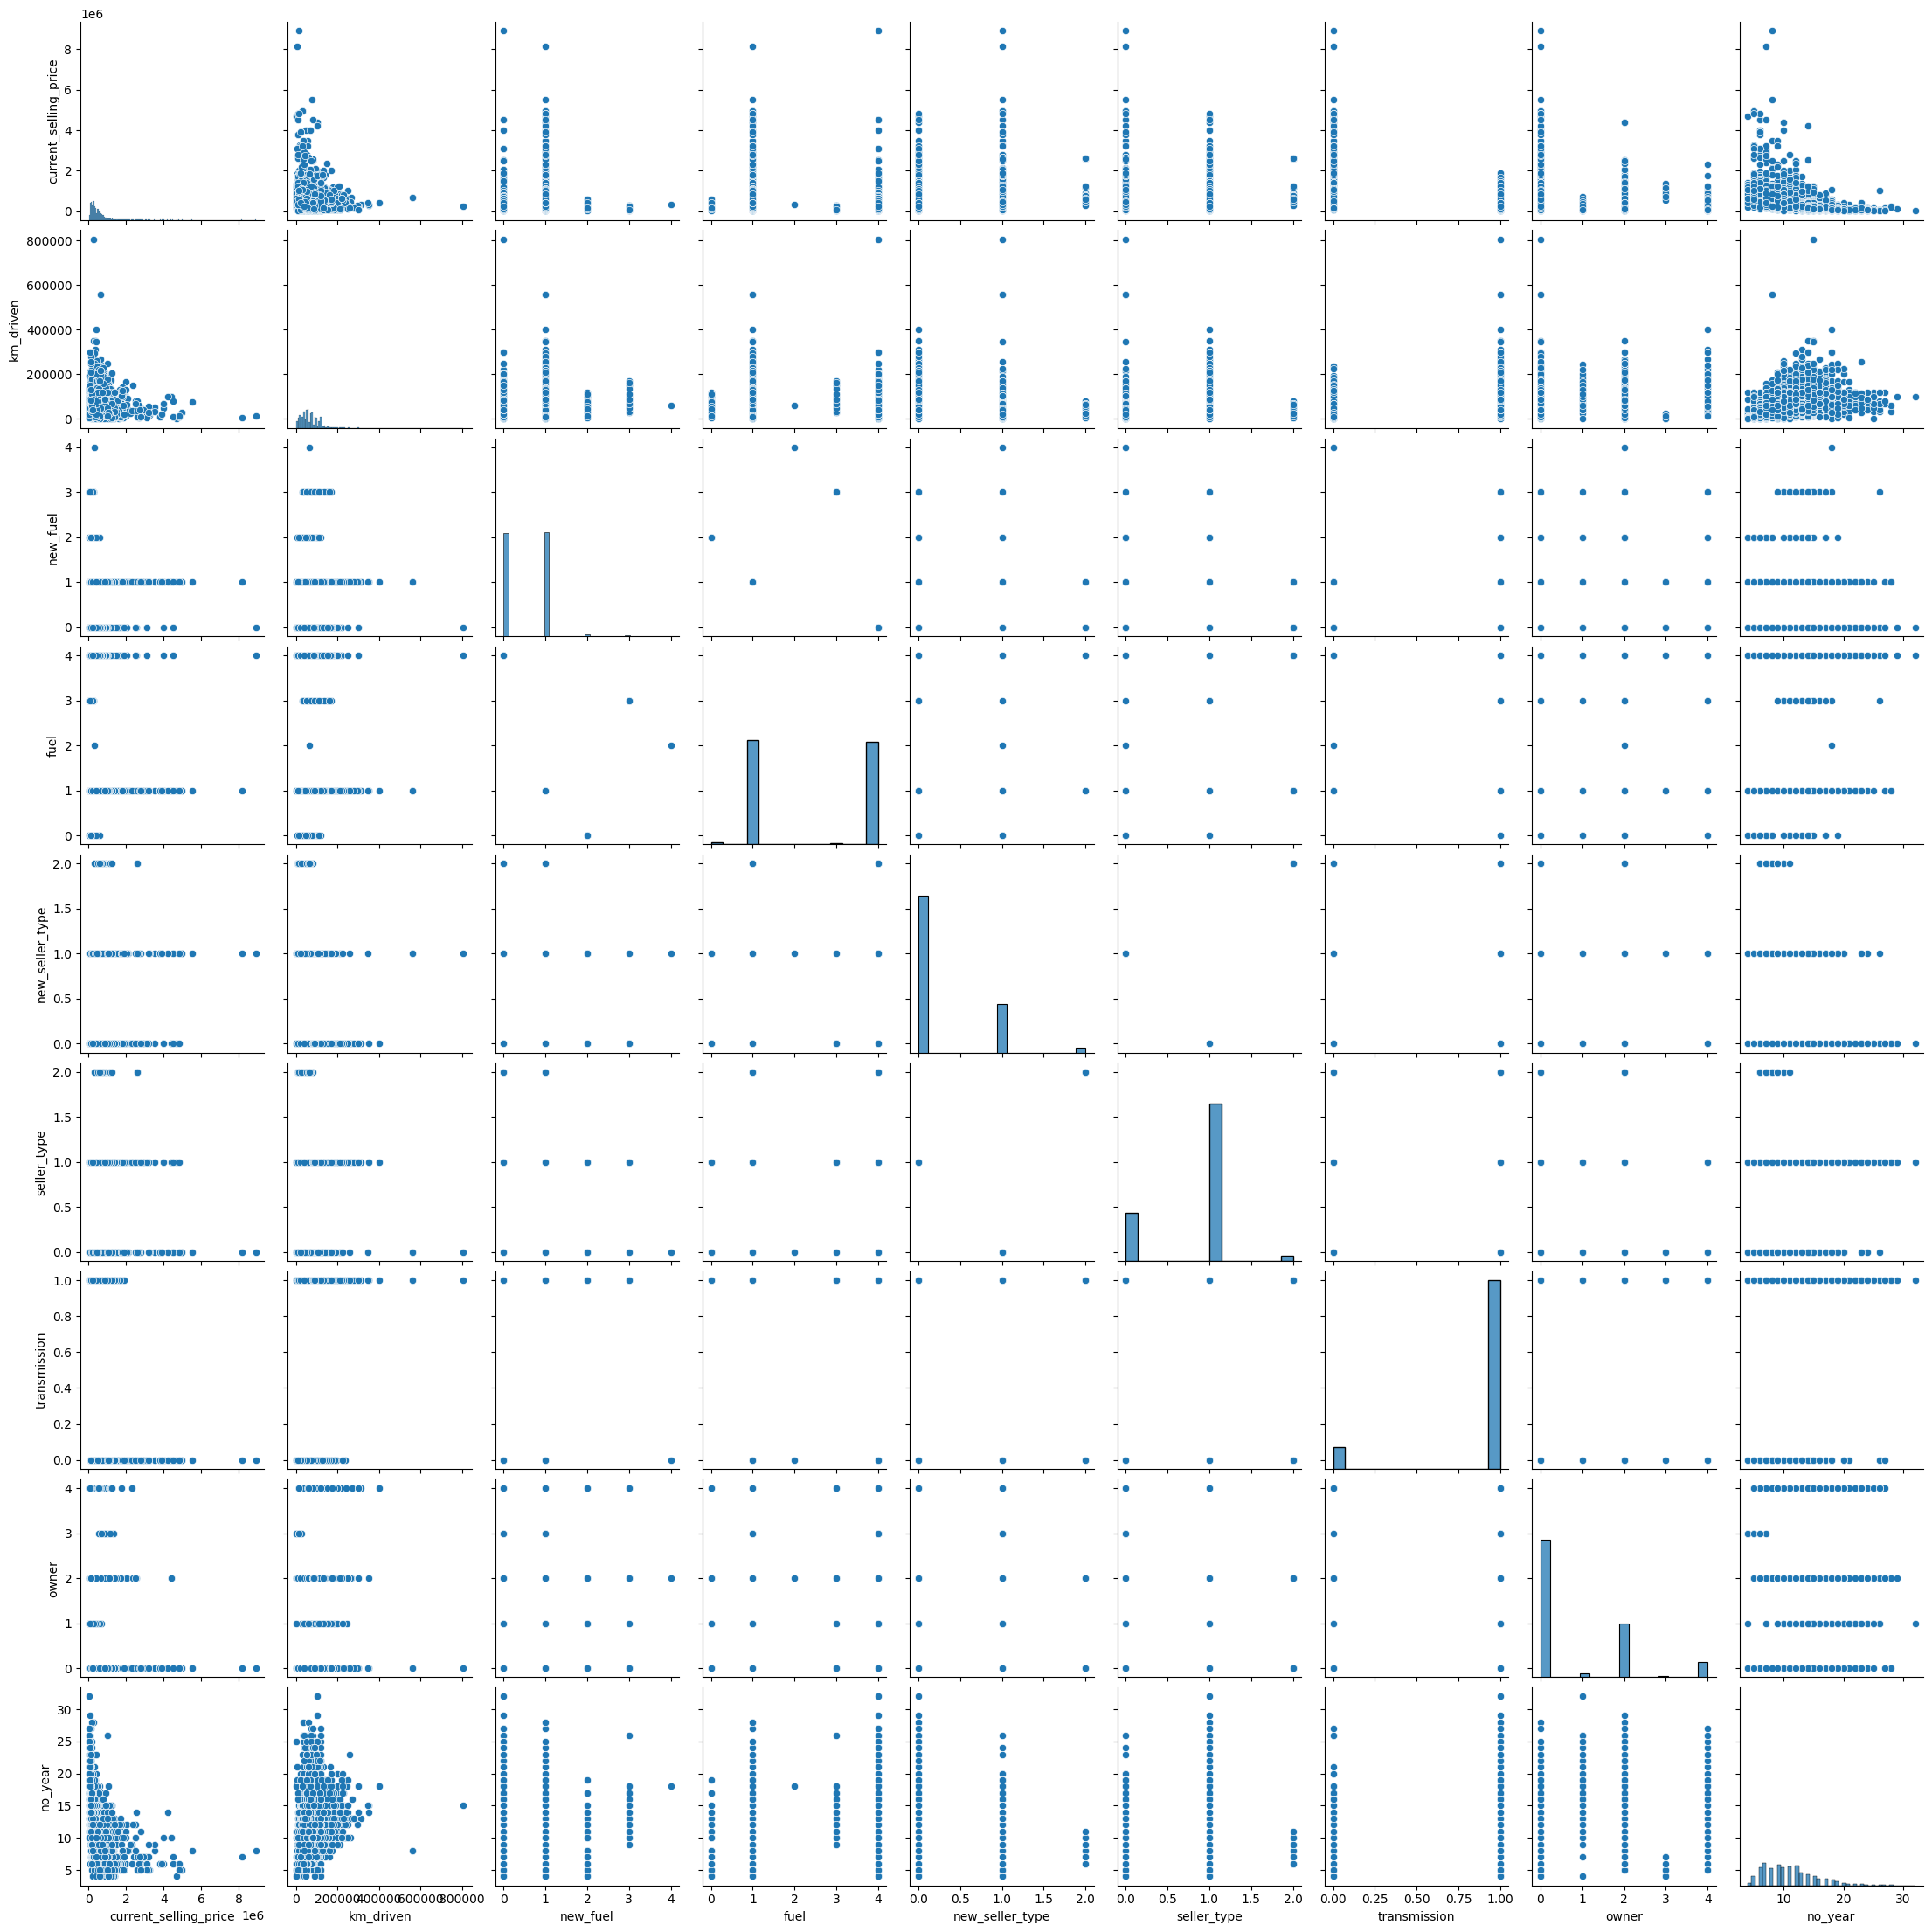

In [68]:
sns.pairplot(df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

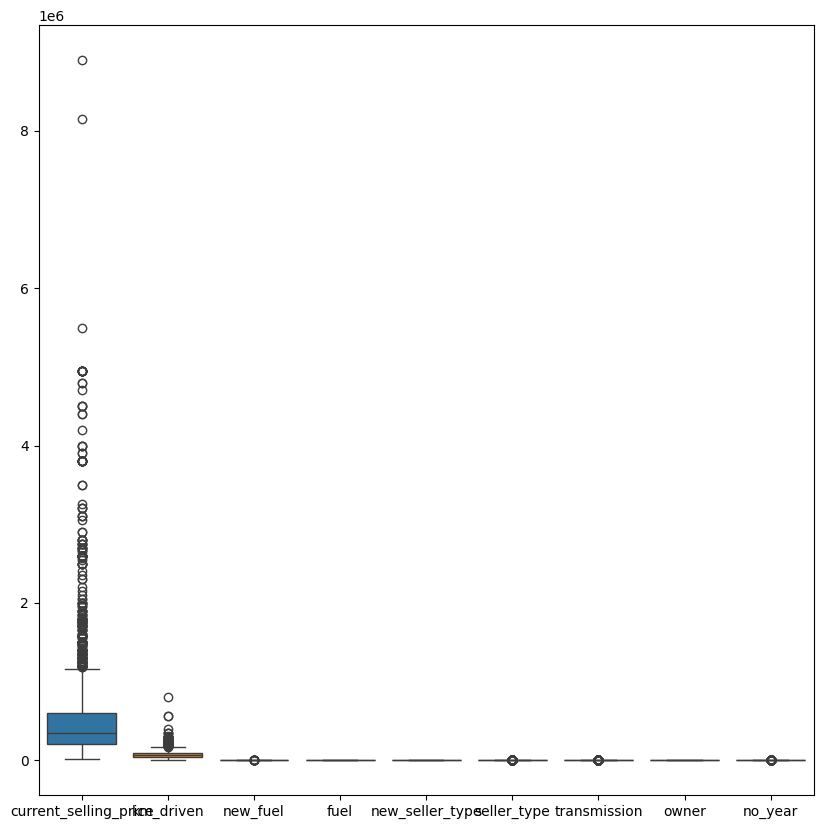

In [70]:
# search of outliers
plt.figure(figsize=(10,10))
sns.boxplot(df)

#machine learning

In [72]:
df.head(3)

,current_selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,no_year
0,60000,70000,0,4,0,1,1,0,17
1,135000,50000,0,4,0,1,1,0,17
2,600000,100000,1,1,0,1,1,0,12


In [74]:
x=np.array(df.drop(['current_selling_price'],axis=1))
y=np.array(df['current_selling_price'])

In [76]:
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000])

splitting the data

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [79]:
len(x_train)

3472

In [80]:
len(x_test)

868

In [81]:
len(y_train)

3472

In [82]:
len(y_test)

868

choosing the model

In [83]:
regressor=DecisionTreeRegressor()

training /fitting data

In [96]:
regressor.fit(x_train,y_train).get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [86]:
y_pred=regressor.predict(x_test)

In [87]:
target=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [88]:
target.head()

,Actual,Predicted
0,300000,383999.909091
1,600000,399375.000000
2,170000,190000.000000
3,925000,475000.000000
4,400000,300000.000000


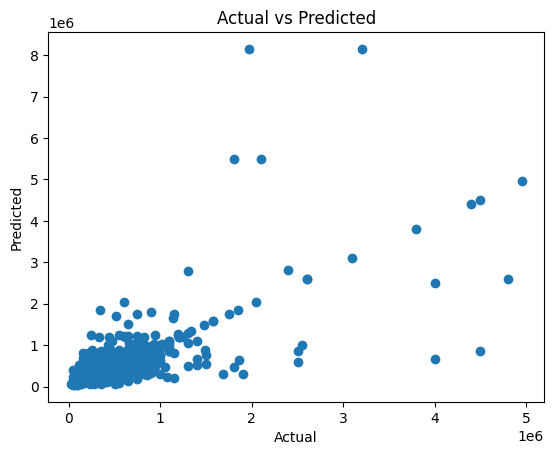

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

ValueError: x and y must be the same size

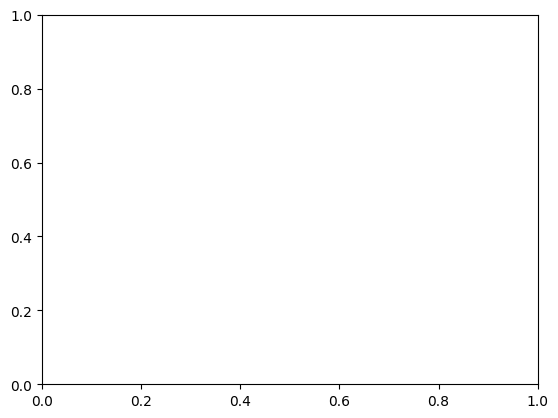

In [91]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='blue')
plt.xlabel('x_test')
plt.ylabel('y_test / y_pred')
plt.show()

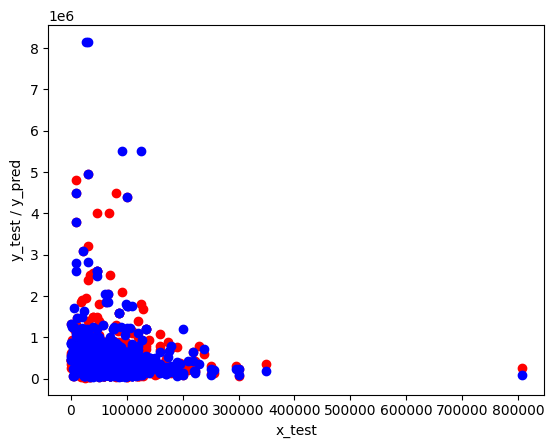

In [92]:
plt.scatter(x_test[:, 0],y_test,color='red') # Select the first column of x_test
plt.scatter(x_test[:, 0],y_pred,color='blue') # Select the first column of x_test
plt.xlabel('x_test')
plt.ylabel('y_test / y_pred') #x_test[:, 0]: This selects all rows ([:]) and the first column (0) of the x_test array. This is your independent variable for this plot.

plt.show()

<Axes: >

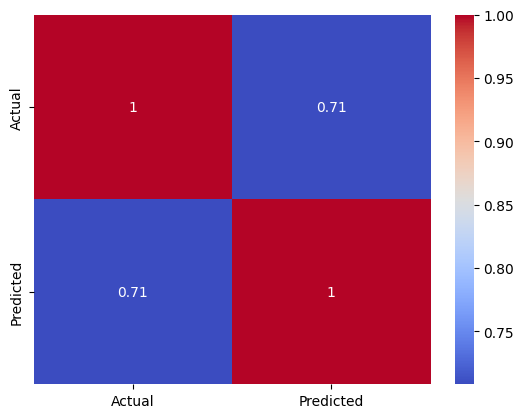

In [93]:
sns.heatmap(target.corr(),annot=True,cmap='coolwarm')
#correlation is good only

In [ ]:
r2_score(y_test,y_pred)# very bad accuracy by seeing scikit documentation implement hyper parameter tuning
# {'ccp_alpha': 0.0,
#  'criterion': 'squared_error',
#  'max_depth': None,
#  'max_features': None,
#  'max_leaf_nodes': None,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'monotonic_cst': None,
#  'random_state': None,
#  'splitter': 'best'} adjust values i.e hyper parameter tuning i.e which parameter suits more to the model

